In [1]:
import re
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all


       | 
       | Downloading package abc to /root/nltk_data...
       |   Package abc is already up-to-date!
       | Downloading package alpino to /root/nltk_data...
       |   Package alpino is already up-to-date!
       | Downloading package averaged_perceptron_tagger to
       |     /root/nltk_data...
       |   Package averaged_perceptron_tagger is already up-to-date!
       | Downloading package averaged_perceptron_tagger_ru to
       |     /root/nltk_data...
       |   Package averaged_perceptron_tagger_ru is already up-to-
       |       date!
       | Downloading package basque_grammars to /root/nltk_data...
       |   Package basque_grammars is already up-to-date!
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Package biocreative_ppi is already up-to-date!
       | Downloading package bllip_wsj_no_aux to /root/nltk_data...
       |   Package bllip_wsj_no_aux is already up-to-date!
       | Downloading package book_grammars to /root/nltk_data..


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [2]:
import pandas as pd

df = pd.read_csv('/content/train.csv')
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [3]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [4]:
df = df.dropna()
messages = df.copy()
messages.reset_index(inplace = True)
messages.head()

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [5]:
import string
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
lem = WordNetLemmatizer()
corpus = []

for i in range(len(df)):
  rev = re.sub('[^a-zA-Z]',' ',messages.title[i])
  rev = rev.lower()
  rev = rev.split()
  rev = [lem.lemmatize(word) for word in rev if (word not in stopwords.words('english')) and (word not in string.punctuation)]
  rev = ' '.join(rev)
  corpus.append(rev)

corpus[:5]

['house dem aide even see comey letter jason chaffetz tweeted',
 'flynn hillary clinton big woman campus breitbart',
 'truth might get fired',
 'civilian killed single u airstrike identified',
 'iranian woman jailed fictional unpublished story woman stoned death adultery']

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(max_features=5000,ngram_range=(1,2))
X = tf.fit_transform(corpus).toarray()
X.shape

(18285, 5000)

In [7]:
y = messages.label

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [9]:
tf.get_feature_names()[:20]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['abandon',
 'abandoned',
 'abc',
 'abc news',
 'abduction',
 'abe',
 'abedin',
 'able',
 'abortion',
 'abroad',
 'absolutely',
 'absurd',
 'abuse',
 'abuse new',
 'accept',
 'accepting',
 'access',
 'access pipeline',
 'accident',
 'accidentally']

In [10]:
tf.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 2),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [11]:
count_df = pd.DataFrame(data=X_train, columns=tf.get_feature_names())
count_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abandon,abandoned,abc,abc news,abduction,abe,abedin,able,abortion,abroad,...,zealand,zero,zika,zika virus,zionist,zone,zone new,zoo,zu,zuckerberg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Multimonial NB Algorithm

In [13]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import numpy as np
import itertools

clf = MultinomialNB()

accuracy:   0.877
Confusion matrix, without normalization


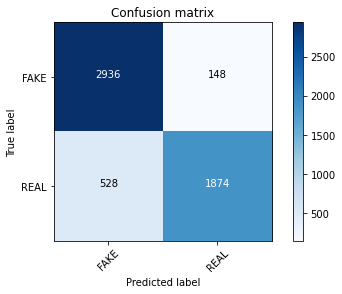

In [15]:
clf.fit(X_train,y_train)
pred = clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

## Multimonial with Hyperparameter

In [16]:
classifier=MultinomialNB(alpha=0.1)

In [17]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


Alpha: 0.0, Score : 0.8576376230404666
Alpha: 0.1, Score : 0.8713087860007291
Alpha: 0.2, Score : 0.8736784542471746
Alpha: 0.30000000000000004, Score : 0.8751367116296026
Alpha: 0.4, Score : 0.8762304046664237
Alpha: 0.5, Score : 0.8765949690120306
Alpha: 0.6000000000000001, Score : 0.8767772511848341
Alpha: 0.7000000000000001, Score : 0.8775063798760481
Alpha: 0.8, Score : 0.8778709442216551
Alpha: 0.9, Score : 0.8778709442216551


In [20]:
### Most real
feature_names = tf.get_feature_names()
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


[(-4.895341147932127, 'hillary'),
 (-4.921886745626205, 'trump'),
 (-5.0136082486090725, 'clinton'),
 (-5.400196748858097, 'election'),
 (-5.675120682233375, 'video'),
 (-5.746889953599492, 'comment'),
 (-5.754379189639452, 'war'),
 (-5.80889077099239, 'hillary clinton'),
 (-5.8549676820833785, 'fbi'),
 (-5.9111326263809945, 'world'),
 (-5.95483369732789, 'email'),
 (-6.06482591365807, 'obama'),
 (-6.096331413106259, 'america'),
 (-6.097447771705743, 'russia'),
 (-6.173385238770382, 'american'),
 (-6.219945887762009, 'donald'),
 (-6.227983657619282, 'day'),
 (-6.262531452701456, 'donald trump'),
 (-6.279911886859118, 'vote'),
 (-6.344996216289203, 'wikileaks')]

In [21]:
sorted(zip(classifier.coef_[0], feature_names))[:20]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


[(-9.907456069520169, 'abe'),
 (-9.907456069520169, 'abroad'),
 (-9.907456069520169, 'abuse new'),
 (-9.907456069520169, 'accord'),
 (-9.907456069520169, 'act new'),
 (-9.907456069520169, 'advice'),
 (-9.907456069520169, 'adviser new'),
 (-9.907456069520169, 'affordable'),
 (-9.907456069520169, 'affordable care'),
 (-9.907456069520169, 'age new'),
 (-9.907456069520169, 'agenda breitbart'),
 (-9.907456069520169, 'ailes'),
 (-9.907456069520169, 'aleppo new'),
 (-9.907456069520169, 'ali'),
 (-9.907456069520169, 'america breitbart'),
 (-9.907456069520169, 'american breitbart'),
 (-9.907456069520169, 'american new'),
 (-9.907456069520169, 'amp'),
 (-9.907456069520169, 'amy'),
 (-9.907456069520169, 'amy schumer')]